In [1]:
import numpy as np
# Đọc train data
train_images = np.load('train_images.npy')
train_labels = np.load('train_labels.npy')

# Đọc validation data
val_images = np.load('val_images.npy')
val_labels = np.load('val_labels.npy')

# Đọc test data
test_images = np.load('test_images.npy')
test_labels = np.load('test_labels.npy')


In [2]:
print(train_images.shape, train_labels.shape, val_images.shape, val_labels.shape, test_images.shape, test_labels.shape)

(10000, 225) (10000,) (10000, 225) (10000,) (5000, 225) (5000,)


In [3]:
train_images = train_images[:5000]
train_labels = train_labels[:5000]
val_images = val_images[:5000]
val_labels = val_labels[:5000]
test_images = test_images[:2500]
test_labels = test_labels[:2500]

In [4]:
print(train_images.shape, train_labels.shape, val_images.shape, val_labels.shape, test_images.shape, test_labels.shape)

(5000, 225) (5000,) (5000, 225) (5000,) (2500, 225) (2500,)


In [5]:
print(set(train_labels), set(val_labels), set(test_labels), sep='\n')

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


In [6]:
print(min(train_images[0]), max(train_images[0]))

-35.20376 84.69277


các bước là: b1. resize, b2. đưa về thang màu rgb, b3. đưa về thuộc vào [0, 1], b4. (x - mean) / std  

In [7]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks


2024-05-03 01:18:42.288000: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 01:18:42.288152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 01:18:42.352462: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 01:18:42.494826: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 01:18:47.117193: W tensorflow/compiler/tf2

In [6]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()

In [7]:
# Kiến trúc của mạng neural network
architecture = ann.get_params()

print(architecture)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [8]:
ann.fit(train_images, train_labels)

MLPClassifier()

In [9]:
y_pred = ann.predict(train_images)
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
train_labels[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
from sklearn.metrics import accuracy_score # for evaluating results
print(accuracy_score(train_labels, y_pred))

0.9998


In [16]:
y_pred_test = ann.predict(test_images)
y_pred_test[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
test_labels[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
from sklearn.metrics import accuracy_score # for evaluating results
print(accuracy_score(test_labels, y_pred_test))

0.5122


In [19]:
y_pred_val = ann.predict(val_images)
y_pred_val[:20]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 4, 9, 3, 7, 2, 9, 1, 0, 0, 0])

In [21]:
val_labels[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score # for evaluating results
print(accuracy_score(val_labels, y_pred_val))

0.367


In [33]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)
# o.513

In [8]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(input_shape=(225,)),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [9]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [10]:
from tensorflow.keras import layers, models, callbacks

# Callback để lưu lại model có accuracy cao nhất trên tập validation
checkpoint = callbacks.ModelCheckpoint(
    "best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max"
)

In [11]:
# Huấn luyện mô hình
history = model.fit(
    train_images,
    train_labels,
    epochs=100,
    validation_data=(val_images, val_labels),
    callbacks=[checkpoint],
)


Epoch 1/100
157/157 [==============================] - 6s 13ms/step - loss: 2.8086 - accuracy: 0.2038 - val_loss: 1.7387 - val_accuracy: 0.3672
Epoch 2/100
  7/157 [>.............................] - ETA: 1s - loss: 2.1603 - accuracy: 0.3036

/home/harito/venv/py/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 2s 10ms/step - loss: 1.9782 - accuracy: 0.3410 - val_loss: 1.4720 - val_accuracy: 0.4174
Epoch 3/100
157/157 [==============================] - 2s 10ms/step - loss: 1.6303 - accuracy: 0.3986 - val_loss: 1.3922 - val_accuracy: 0.4148
Epoch 4/100
157/157 [==============================] - 2s 12ms/step - loss: 1.4634 - accuracy: 0.4282 - val_loss: 1.3674 - val_accuracy: 0.4190
Epoch 5/100
157/157 [==============================] - 2s 10ms/step - loss: 1.3603 - accuracy: 0.4438 - val_loss: 1.3354 - val_accuracy: 0.4498
Epoch 6/100
157/157 [==============================] - 2s 10ms/step - loss: 1.2882 - accuracy: 0.4810 - val_loss: 1.3278 - val_accuracy: 0.4448
Epoch 7/100
157/157 [==============================] - 2s 10ms/step - loss: 1.2281 - accuracy: 0.5040 - val_loss: 1.3128 - val_accuracy: 0.4538
Epoch 8/100
157/157 [==============================] - 2s 11ms/step - loss: 1.1903 - accuracy: 0.5276 - val_loss: 1.3146 - val_accuracy: 0.4470
Epoc

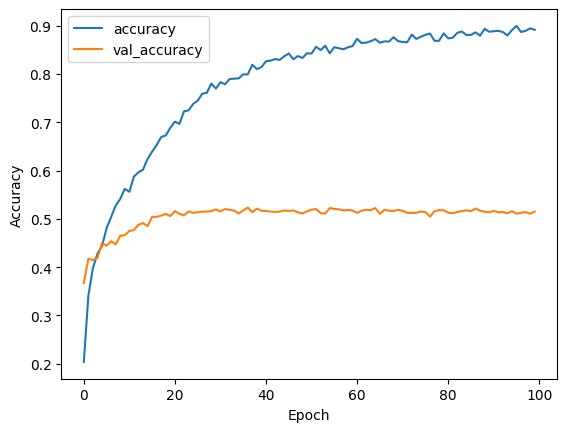

In [12]:
import matplotlib.pyplot as plt

# Biểu đồ lịch sử huấn luyện
def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history)
# vs sigmoid

In [13]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

79/79 [==============================] - 0s 3ms/step - loss: 1.3961 - accuracy: 0.5884
Test accuracy: 0.5884000062942505


In [24]:
# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import (
    Callback,
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam

# Data Augmentation Step
augment = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(224, 224),
        layers.experimental.preprocessing.Rescaling(1.0 / 255),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomContrast(0.1),
    ]
)


# Load the pretained model
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB7(
    input_shape=(224, 224, 3), include_top=False, weights="imagenet", pooling="max"
)

pretrained_model.trainable = False

258076736/258076736 [==============================] - 646s 3us/step


In [25]:
from keras.models import Model
from keras.layers import Dense, Dropout, BatchNormalization

# Tạo kiến trúc mô hình
inputs = pretrained_model.input
x = augment(inputs)

x = Dense(128, activation='relu')(pretrained_model.output)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Xem kiến trúc mô hình
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling_1[0][0]']         
 on)                                                                                              
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

In [26]:
# Create checkpoint callback
checkpoint_path = "animals_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(
    checkpoint_path, save_weights_only=True, monitor="val_accuracy", save_best_only=True
)

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(
    monitor="val_loss",  # watch the val loss metric
    patience=5,
    restore_best_weights=True,
)  # if val loss decreases for 3 epochs in a row, stop training

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)

In [32]:
model.compile(
    optimizer=Adam(0.00001), loss="categorical_crossentropy", metrics=["accuracy"]
)

history = model.fit(
    train_images,
    train_labels,
    # epochs=20,
    validation_data=(val_images, val_labels),
    epochs=10,
    callbacks=[
        early_stopping,
        # create_tensorboard_callback("training_logs", "animals_classification"),
        checkpoint_callback,
        reduce_lr,
    ],
)

Epoch 1/10


ValueError: in user code:

    File "/home/harito/venv/py/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/harito/venv/py/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/harito/venv/py/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/harito/venv/py/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/harito/venv/py/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/harito/venv/py/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 225)
